<a href="https://colab.research.google.com/github/linkwine/machine-learning/blob/master/select_algorithm_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SKlearn algorithm cheatsheet

This exercise aims to practice algorithm selection skills with sklearn algorithm cheatsheet.
Titanic dataset from kaggle website is used.
https://www.kaggle.com/c/titanic


![ml_map](https://raw.githubusercontent.com/linkwine/machine-learning/master/ml_map_1.png)



### Loading Library

In [0]:
# data manipulation
import pandas as pd
import numpy as np

# visualization
import seaborn as sns

### Reading Data from Github

In [0]:
# 1. get titanic & test csv files as a DataFrame

train_df = pd.read_csv('https://raw.githubusercontent.com/linkwine/machine-learning/master/train.csv')
test_df  = pd.read_csv('https://raw.githubusercontent.com/linkwine/machine-learning/master/test.csv')

full_data = [train_df, test_df] 

# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
train_df.info()
print("----------------------------")
test_df.info()

# Age and Cabin have a lot of missing values
# Embarked has 2 missing values in the training set
# Fare has 1 missing values in the test set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare

### Conducting Descriptive Analysis

In [0]:
# 2. conduct descriptive analysis 
###  to see relationship between each explainatory variable and the outcome 'Survived'

# pclass
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

# the higher the class, the higher chance of survival

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [0]:
# sex
print (train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())

# female seem to has a better chance surviving

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [0]:
# SibSp & Parch

# combine the two column as 'Family'

for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] 
print (train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())


### Family size between 2 and 4 seems to have a higher survival rate (survival rate greater than 50%)

   FamilySize  Survived
0           0  0.303538
1           1  0.552795
2           2  0.578431
3           3  0.724138
4           4  0.200000
5           5  0.136364
6           6  0.333333
7           7  0.000000
8          10  0.000000


In [0]:
# SibSp & Parch continued

# change the variable to binary

for dataset in full_data:
    # add column 'IsAlong', set value to 0
    dataset['IsAlone'] = 0
    # Set value (1) for all items matching the list of labels- 'FamilySize' = 0
    dataset.loc[dataset['FamilySize'] == 0, 'IsAlone'] = 1
  
print (train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

### those who are with family have a higher survival rate

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


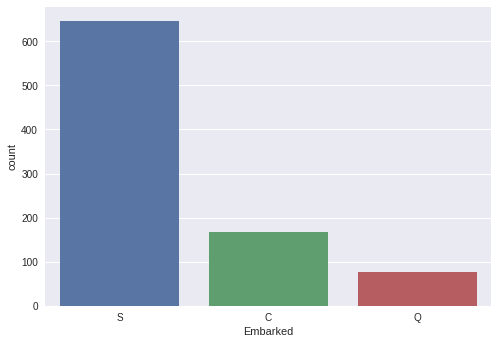

In [0]:
# Embarked

# visualize
sns.countplot(x='Embarked', data=train_df)


# impute missing value with the most occured value 'S' and see the relationship between Survived and Embarked
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print (train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())


### class 'C' appears to have a higher survival rate

     CategoricalFare  Survived
0    (-0.001, 7.854]  0.217877
1      (7.854, 10.5]  0.201087
2     (10.5, 21.679]  0.424419
3   (21.679, 39.688]  0.444444
4  (39.688, 512.329]  0.642045


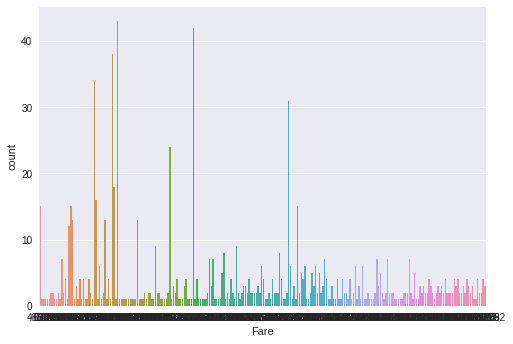

In [0]:
# Fare

# visualize
sns.countplot(x='Fare', data=train_df)
### 'Fare' is continuous, we might want to categorize it


# categorize the data
train_df['CategoricalFare'] = pd.qcut(train_df['Fare'], 5)
print (train_df[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

### the more expensive the fare, the higher chance of survival



In [0]:
# Fare continued

# impute missing value in the test_df
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train_df['Fare'].median())
      

In [0]:
#preview data again
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,CategoricalFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,"(-0.001, 7.854]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,"(39.688, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,"(7.854, 10.5]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,"(39.688, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,"(7.854, 10.5]"


### Cleaning Data

In [0]:
# 3. cleaning data

# we need to transform all string value to integer
# including Sex, Fare, Embarked

for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    

    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)    
                              
    

In [0]:
# 4. Feature Selection

# drop 

drop_elements = ['Name', 'Ticket', 'Cabin', 'Age', 'SibSp', 'Parch', 'FamilySize', 'Fare']
train_df = train_df.drop(columns = drop_elements, axis = 1)
train_df = train_df.drop(['CategoricalFare', 'PassengerId', ], axis = 1)

test_df  = test_df.drop(drop_elements, axis = 1)

print (train_df.head(10))


   Survived  Pclass  Sex  Embarked  IsAlone
0         0       3    1         0        0
1         1       1    0         1        0
2         1       3    0         0        1
3         1       1    0         0        0
4         0       3    1         0        1
5         0       3    1         2        1
6         0       1    1         0        1
7         0       3    1         0        0
8         1       3    0         0        0
9         1       2    0         1        0


### Training the Model

In [0]:
# 5. train the models 

# define training and testing sets

X_train = train_df.drop("Survived",axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()


In [0]:
# load library for machine learning
import sklearn
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [0]:
# Support Vector Machines

lsvc = LinearSVC()

lsvc.fit(X_train, Y_train)

Y_pred_1 = lsvc.predict(X_test)

lsvc.score(X_train, Y_train)

0.7856341189674523

In [0]:
# Knearest Neighbor

knn = KNeighborsClassifier(n_neighbors = 2)

knn.fit(X_train, Y_train)

Y_pred_2 = knn.predict(X_test)

knn.score(X_train, Y_train)

0.792368125701459

In [0]:
# ensemble

clf = RandomForestClassifier(n_estimators=10)

clf.fit(X_train, Y_train)

Y_pred_3 = clf.predict(X_test)

clf.score(X_train, Y_train)

0.8103254769921436

In [0]:
# SVC
svc = SVC()

svc.fit(X_train, Y_train)

Y_pred_4 = svc.predict(X_test)

svc.score(X_train, Y_train)

0.8114478114478114

### Final Results

SVC generates the highest score, which is 0.81.

In [0]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_4
    })
submission.to_csv('titanic.csv', index=False)